# This compares the melt matching algorithms here to the results from the supporting spreadsheet of Neave et al. 2019 (see Melt_Matching_Example_Neave.xlsx)

In [2]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import Thermobar as pt

In [3]:
out=pt.import_excel('MeltMatching_Benchmarks.xlsx', sheet_name="Melts")
out2=pt.import_excel('MeltMatching_Benchmarks.xlsx', sheet_name="Cpxs")
my_input=out['my_input']
myCpxs1=out2['Cpxs']
myLiquids1=out['Liqs']


# Example, making dataframe of matches

In [5]:
# One way to get dataframe out to paste in
Combo_liq_cpxs=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=myCpxs1, 
                                                equationP="P_Neave2017", equationT="T_Put2008_eq33",
                                                        return_all_pairs=True)

Considering 40 Liq-Cpx pairs, be patient if this is >>1 million!
No equilibrium filters applied
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!


In [6]:
#Second way to do this
myCPXs1_concat=myCpxs1
myLiquids1_concat=myLiquids1
DupCPXs = pd.DataFrame(np.repeat(myCPXs1_concat.values,np.shape(myLiquids1_concat)[0],axis=0))
    #.astype('float64') 
DupCPXs.columns = myCPXs1_concat.columns 

DupLiqs=pd.concat([myLiquids1_concat]*np.shape(myCPXs1_concat)[0]).reset_index(drop=True) 
Combo_liq_cpxs=pd.concat([DupLiqs, DupCPXs], axis=1) # Combines these merged liquids and cpx dataframes

In [7]:
# This copies the output to excel to paste into Neave's spreadsheet
Combo_liq_cpxs.to_clipboard(excel=True)

In [8]:
# See Sheet "Cpx Input and Models" of Putirka, se that get no matches with default criteria
melt_match_out=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=myCpxs1, 
                                                equationP="P_Neave2017", equationT="T_Put2008_eq33", KdErr=0.03,
                                                     eq_crit="All",  Fe3FeT_Liq=0.0)

AvMatches_Gleeson_NoFe3=melt_match_out['Av_PTs']
AllMatches_Gleeson_NoFe3=melt_match_out['All_PTs']

TypeError: calculate_cpx_liq_press_temp_matching() got an unexpected keyword argument 'KdErr'

In [12]:
# Say set Kd filter to 0.06, see Sheet "Cpx Input and Models_2" of Putirka, se that get no matches with default criteria
melt_match_out=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=myCpxs1, 
                                                equationP="P_Neave2017", equationT="T_Put2008_eq33", Kd_Err=0.11,
                                                     Fe3Fet_Liq=0.0, 
                                                       DiHd_Err=0.06*4, EnFs_Err=4*0.05,
                                                       CaTs_Err=0.03*4)

AvMatches_Gleeson_NoFe3=melt_match_out['Av_PTs']
AllMatches_Gleeson_NoFe3=melt_match_out['All_PTs']

Considering 40 Liq-Cpx pairs, be patient if this is >>1 million!
40 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!


In [13]:
AllMatches_Gleeson_NoFe3['T_C']=AllMatches_Gleeson_NoFe3['T_K_calc']-273.15
AllMatches_Gleeson_NoFe3['T_C']

27    1206.889007
28    1208.285039
29    1208.338952
31    1204.959196
33    1205.889817
34    1203.927918
35    1206.209066
36    1207.602880
37    1207.656539
39    1204.282002
Name: T_C, dtype: float64

# From Neave spreadsheet
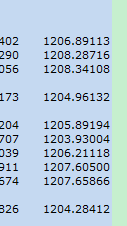

In [14]:
AllMatches_Gleeson_NoFe3['P_kbar_calc']

27    5.993997
28    6.002878
29    6.060537
31    6.001705
33    6.032014
34    6.007048
35    5.860366
36    5.869089
37    5.926715
39    5.868240
Name: P_kbar_calc, dtype: float64

- screengrab from Neave Supplement
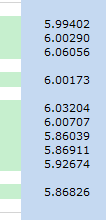